# INTRODUCTION

 The dataset under analysis provides a comprehensive overview of COVID-19 vaccination efforts within the European Union and European Economic Area (EU/EEA) region. As of September 2023, this dataset contains a wealth of information that encompasses crucial facets of the vaccination campaign. It is collected through The European Surveillance System (TESSy) and serves as a fundamental tool for tracking the progress and outcomes of vaccination initiatives.

Contained within this dataset are essential data points, including the number of vaccine doses distributed by manufacturers, details on the administration of first, second, additional, and unspecified doses, and valuable demographic information on target age groups. Moreover, the dataset delves into the realm of vaccine types, revealing which vaccines are most widely used and which have seen the highest administration rates.

One of the dataset's critical features is its temporal dimension, allowing us to observe trends and variations over time. This longitudinal perspective is invaluable for understanding how vaccination efforts have evolved, particularly in response to changing epidemiological circumstances and public health strategies.

In essence, this dataset serves as a treasure trove of insights into the ongoing battle against the COVID-19 pandemic in the EU/EEA. Analyzing this data can unearth trends, patterns, and critical indicators that can guide vaccination strategies, public health policies, and ultimately, contribute to the global effort to combat the virus. In the following analysis, we will embark on a journey through this data, aiming to distill meaningful insights that can inform and improve vaccination efforts in the region.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sklearn.__version__

'1.2.2'

In [53]:
df= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\\Euro Covid19 Vacinnation\\Covid19Vacination4Eurodata.csv")

In [54]:
df

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,DoseAdditional4,DoseAdditional5,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2021-W06,AT,1047888.0,0.0,0.0,0,NaN,0,0,0,0,0,0,89,AT,Age60_69,UNK,8932664
1,2022-W17,AT,753524.0,0.0,0.0,0,NaN,0,0,0,0,0,0,3,AT,Age70_79,UNK,8978929
2,2022-W13,AT,1047888.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,AT,Age60_69,MODBA.1,8978929
3,2022-W13,AT,1399348.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,AT,Age50_59,MODBA.1,8978929
4,2022-W13,AT,502105.0,0.0,0.0,1,NaN,4,21,16,0,0,0,0,AT,Age80+,MOD,8978929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792630,2022-W18,SK,407927.0,0.0,0.0,2,NaN,3,4,3,0,0,0,0,SK,Age70_79,NVXD,5434712
792631,2021-W41,SK,289995.0,0.0,0.0,0,NaN,2,0,0,0,0,0,0,SK,Age5_9,COM,5459781
792632,2021-W41,SK,701757.0,0.0,0.0,1040,NaN,1289,116,0,0,0,0,0,SK,Age50_59,COM,5459781
792633,2022-W18,SK,688658.0,0.0,0.0,2,NaN,5,10,3,0,0,0,0,SK,Age60_69,NVXD,5434712


In [55]:
df.columns

Index(['YearWeekISO', 'ReportingCountry', 'Denominator', 'NumberDosesReceived',
       'NumberDosesExported', 'FirstDose', 'FirstDoseRefused', 'SecondDose',
       'DoseAdditional1', 'DoseAdditional2', 'DoseAdditional3',
       'DoseAdditional4', 'DoseAdditional5', 'UnknownDose', 'Region',
       'TargetGroup', 'Vaccine', 'Population'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792635 entries, 0 to 792634
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YearWeekISO          792635 non-null  object 
 1   ReportingCountry     792635 non-null  object 
 2   Denominator          425357 non-null  float64
 3   NumberDosesReceived  104647 non-null  float64
 4   NumberDosesExported  111895 non-null  float64
 5   FirstDose            792635 non-null  int64  
 6   FirstDoseRefused     1447 non-null    float64
 7   SecondDose           792635 non-null  int64  
 8   DoseAdditional1      792635 non-null  int64  
 9   DoseAdditional2      792635 non-null  int64  
 10  DoseAdditional3      792635 non-null  int64  
 11  DoseAdditional4      792635 non-null  int64  
 12  DoseAdditional5      792635 non-null  int64  
 13  UnknownDose          792635 non-null  int64  
 14  Region               792635 non-null  object 
 15  TargetGroup      

In [57]:
df.describe()

,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,DoseAdditional4,DoseAdditional5,UnknownDose,Population
count,4.253570e+05,1.046470e+05,1.118950e+05,7.926350e+05,1447.000000,7.926350e+05,7.926350e+05,7.926350e+05,792635.000000,792635.000000,792635.000000,792635.000000,7.926350e+05
mean,1.517286e+06,1.431896e+04,8.092932e+02,1.177571e+03,0.401520,1.071821e+03,8.498551e+02,2.272809e+02,32.319729,0.492942,0.000005,9.771672,1.589001e+07
std,4.902650e+06,1.798126e+05,3.905213e+04,2.351977e+04,3.208059,2.264098e+04,2.566300e+04,5.532838e+03,1296.410678,70.067663,0.002246,1128.905862,1.749312e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,3.905500e+04
25%,9.569500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.533793e+06
50%,2.749550e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.548241e+06
75%,1.038378e+06,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,3.765425e+07
max,6.941109e+07,1.889280e+07,6.488820e+06,4.021725e+06,73.000000,4.149209e+06,6.647843e+06,1.247496e+06,338110.000000,22531.000000,1.000000,429061.000000,8.323712e+07


# Handling Mission Data

In [58]:
df.isna().sum()

YearWeekISO                 0
ReportingCountry            0
Denominator            367278
NumberDosesReceived    687988
NumberDosesExported    680740
FirstDose                   0
FirstDoseRefused       791188
SecondDose                  0
DoseAdditional1             0
DoseAdditional2             0
DoseAdditional3             0
DoseAdditional4             0
DoseAdditional5             0
UnknownDose                 0
Region                      0
TargetGroup                 0
Vaccine                     0
Population                  0
dtype: int64

In [59]:
columns_to_drop = ['Denominator', 'NumberDosesReceived', 'NumberDosesExported', 'FirstDoseRefused']

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

# Feature Engineering 

In [60]:
df.head()

,YearWeekISO,ReportingCountry,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,DoseAdditional4,DoseAdditional5,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2021-W06,AT,0,0,0,0,0,0,0,89,AT,Age60_69,UNK,8932664
1,2022-W17,AT,0,0,0,0,0,0,0,3,AT,Age70_79,UNK,8978929
2,2022-W13,AT,0,0,0,0,0,0,0,0,AT,Age60_69,MODBA.1,8978929
3,2022-W13,AT,0,0,0,0,0,0,0,0,AT,Age50_59,MODBA.1,8978929
4,2022-W13,AT,1,4,21,16,0,0,0,0,AT,Age80+,MOD,8978929


# Coverting The YearWeekISO to Datetime Format

In [61]:
import pandas as pd

# Assuming 'YearWeekISO' is a string column
df['YearWeekISO'] = pd.to_datetime(df['YearWeekISO'] + '-1', format='%G-W%V-%u')

#let change the columns name to date
df.rename(columns={'YearWeekISO': 'Date'}, inplace=True)


In [62]:
df.head()

,Date,ReportingCountry,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,DoseAdditional4,DoseAdditional5,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2021-02-08,AT,0,0,0,0,0,0,0,89,AT,Age60_69,UNK,8932664
1,2022-04-25,AT,0,0,0,0,0,0,0,3,AT,Age70_79,UNK,8978929
2,2022-03-28,AT,0,0,0,0,0,0,0,0,AT,Age60_69,MODBA.1,8978929
3,2022-03-28,AT,0,0,0,0,0,0,0,0,AT,Age50_59,MODBA.1,8978929
4,2022-03-28,AT,1,4,21,16,0,0,0,0,AT,Age80+,MOD,8978929


# Extrating Numerical Age From the Target Group and Store it in New Columns called AgeGroup

In [63]:
import re

# Define a function to extract the numerical range
def extract_age_range(target_group):
    # Use regular expressions to find the numeric part
    match = re.search(r'\d+', target_group)
    if match:
        return int(match.group())
    else:
        return None

# Apply the function to the 'TargetGroup' column and create a new 'AgeGroup' column
df['AgeGroup'] = df['TargetGroup'].apply(extract_age_range)

df.head()

,Date,ReportingCountry,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,DoseAdditional4,DoseAdditional5,UnknownDose,Region,TargetGroup,Vaccine,Population,AgeGroup
0,2021-02-08,AT,0,0,0,0,0,0,0,89,AT,Age60_69,UNK,8932664,60.0
1,2022-04-25,AT,0,0,0,0,0,0,0,3,AT,Age70_79,UNK,8978929,70.0
2,2022-03-28,AT,0,0,0,0,0,0,0,0,AT,Age60_69,MODBA.1,8978929,60.0
3,2022-03-28,AT,0,0,0,0,0,0,0,0,AT,Age50_59,MODBA.1,8978929,50.0
4,2022-03-28,AT,1,4,21,16,0,0,0,0,AT,Age80+,MOD,8978929,80.0


In [64]:
#let check for the uniqueness of each columns

unique_counts = df.nunique()

# Print the unique counts for each column
print(unique_counts)

Date                  143
ReportingCountry       30
FirstDose           18554
SecondDose          17362
DoseAdditional1     12885
DoseAdditional2      8706
DoseAdditional3      3248
DoseAdditional4       222
DoseAdditional5         2
UnknownDose           851
Region                126
TargetGroup            17
Vaccine                18
Population             88
AgeGroup               11
dtype: int64


In [65]:
# Create a new column 'TotalDose' by summing all the dose-related columns
df['TotalDose'] = df['FirstDose'] + df['SecondDose'] + df['DoseAdditional1'] + df['DoseAdditional2'] + df['DoseAdditional3'] + df['DoseAdditional4'] + df['DoseAdditional5'] + df['UnknownDose']

# Now you have a single column 'TotalDose' that represents the total doses administered.


# EXPLORATORY DATA ANALYSIS

In [83]:
df.head()

,Date,ReportingCountry,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,DoseAdditional4,DoseAdditional5,UnknownDose,Region,TargetGroup,Vaccine,Population,AgeGroup,TotalDose
0,2021-02-08,AT,0,0,0,0,0,0,0,89,AT,Age60_69,UNK,8932664,60.0,89
1,2022-04-25,AT,0,0,0,0,0,0,0,3,AT,Age70_79,UNK,8978929,70.0,3
2,2022-03-28,AT,0,0,0,0,0,0,0,0,AT,Age60_69,MODBA.1,8978929,60.0,0
3,2022-03-28,AT,0,0,0,0,0,0,0,0,AT,Age50_59,MODBA.1,8978929,50.0,0
4,2022-03-28,AT,1,4,21,16,0,0,0,0,AT,Age80+,MOD,8978929,80.0,42


In [97]:
country_with_most_doses = df.groupby('ReportingCountry')['TotalDose'].sum().idxmax()
most_doses = df.groupby('ReportingCountry')['TotalDose'].sum().max()
print(f"The country with the most doses is {country_with_most_doses} with a total of {most_doses} doses.")

The country with the most doses is FR with a total of 631994928 doses.


In [98]:
#Most Age Group with the Most First Doses, Second Doses, and Total Doses:
most_first_dose_age_group = df.groupby('AgeGroup')['FirstDose'].sum().idxmax()
most_second_dose_age_group = df.groupby('AgeGroup')['SecondDose'].sum().idxmax()
most_total_dose_age_group = df.groupby('AgeGroup')['TotalDose'].sum().idxmax()
print(f"The most first doses are in the {most_first_dose_age_group} age group.")
print(f"The most second doses are in the {most_second_dose_age_group} age group.")
print(f"The most total doses are in the {most_total_dose_age_group} age group.")

The most first doses are in the 25.0 age group.
The most second doses are in the 25.0 age group.
The most total doses are in the 25.0 age group.


In [100]:
country_with_most_unknown_doses = df.groupby('ReportingCountry')['UnknownDose'].sum().idxmax()
most_unknown_doses = df.groupby('ReportingCountry')['UnknownDose'].sum().max()
print(f"The country with the most unknown doses is {country_with_most_unknown_doses} with a total of {most_unknown_doses} doses.")

The country with the most unknown doses is IT with a total of 7246376 doses.


In [101]:
most_used_vaccine = df['Vaccine'].value_counts().idxmax()
most_used_vaccine_count = df['Vaccine'].value_counts().max()
print(f"The most used vaccine in the EU/EEA is {most_used_vaccine} with {most_used_vaccine_count} doses administered.")

The most used vaccine in the EU/EEA is COM with 120985 doses administered.


# Exploring the Covid 19 Doses by Reporting Country

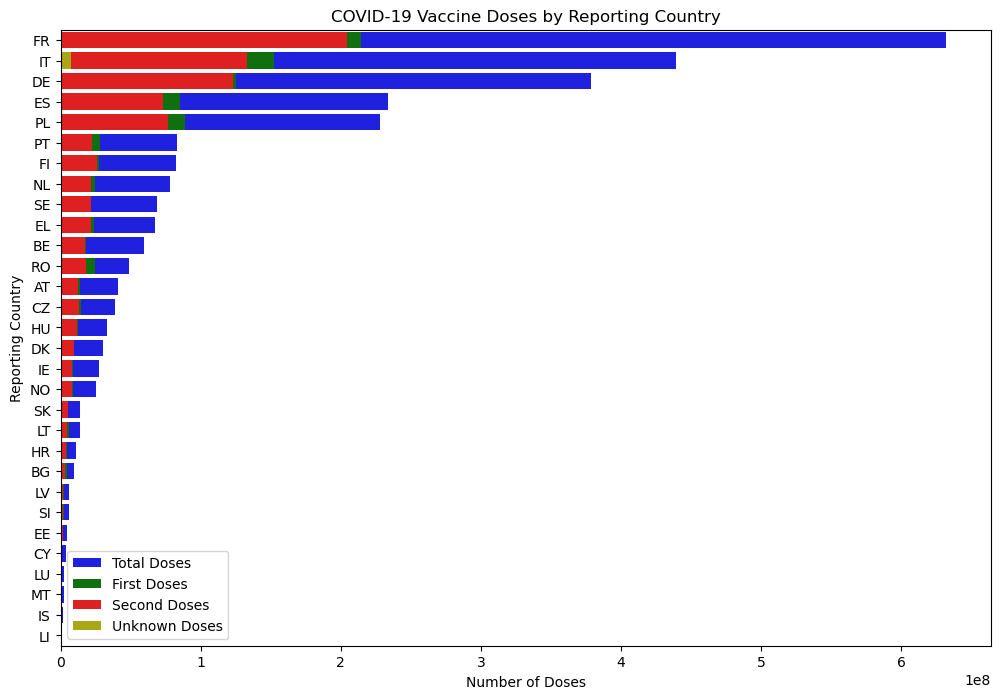

In [68]:
# Group the data by 'ReportingCountry' and calculate the sum of doses for each category
country_doses = df.groupby('ReportingCountry')[['TotalDose', 'FirstDose', 'SecondDose', 'UnknownDose']].sum().reset_index()

# Sort the data by 'TotalDose' in descending order for better visualization
country_doses = country_doses.sort_values(by='TotalDose', ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x='TotalDose', y='ReportingCountry', data=country_doses, label='Total Doses', color='b')
sns.barplot(x='FirstDose', y='ReportingCountry', data=country_doses, label='First Doses', color='g')
sns.barplot(x='SecondDose', y='ReportingCountry', data=country_doses, label='Second Doses', color='r')
sns.barplot(x='UnknownDose', y='ReportingCountry', data=country_doses, label='Unknown Doses', color='y')

# Customize the plot
plt.xlabel('Number of Doses')
plt.ylabel('Reporting Country')
plt.title('COVID-19 Vaccine Doses by Reporting Country')
plt.legend(loc='best')

# Show the plot
plt.show()

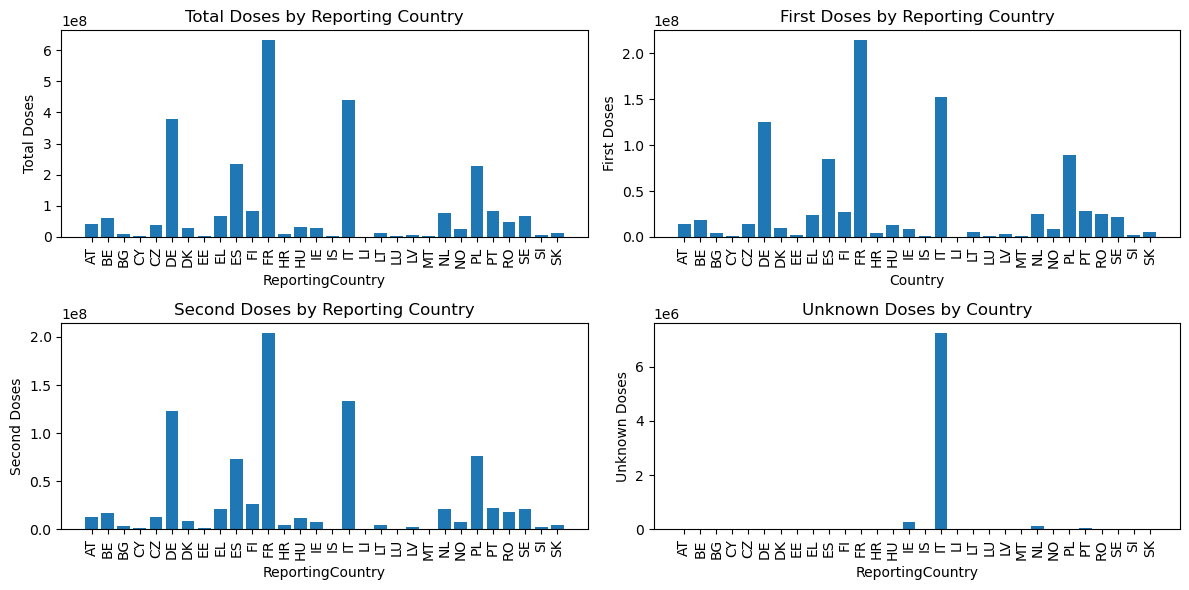

In [82]:
# Group by 'Country' and calculate the sum of each dose type
grouped_data = df.groupby('ReportingCountry')[['TotalDose', 'FirstDose', 'SecondDose', 'UnknownDose']].sum()

# Plot the data
plt.figure(figsize=(12, 6))

# Total Doses by Country
plt.subplot(2, 2, 1)
plt.bar(grouped_data.index, grouped_data['TotalDose'])
plt.title('Total Doses by Reporting Country')
plt.xlabel('ReportingCountry')
plt.ylabel('Total Doses')
plt.xticks(rotation=90)

# First Doses by Country
plt.subplot(2, 2, 2)
plt.bar(grouped_data.index, grouped_data['FirstDose'])
plt.title('First Doses by Reporting Country')
plt.xlabel('Country')
plt.ylabel('First Doses')
plt.xticks(rotation=90)

# Second Doses by Country
plt.subplot(2, 2, 3)
plt.bar(grouped_data.index, grouped_data['SecondDose'])
plt.title('Second Doses by Reporting Country')
plt.xlabel('ReportingCountry')
plt.ylabel('Second Doses')
plt.xticks(rotation=90)

# Unknown Doses by Country
plt.subplot(2, 2, 4)
plt.bar(grouped_data.index, grouped_data['UnknownDose'])
plt.title('Unknown Doses by Country')
plt.xlabel('ReportingCountry')
plt.ylabel('Unknown Doses')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Exploring the Covid 19 Doses by Age Group

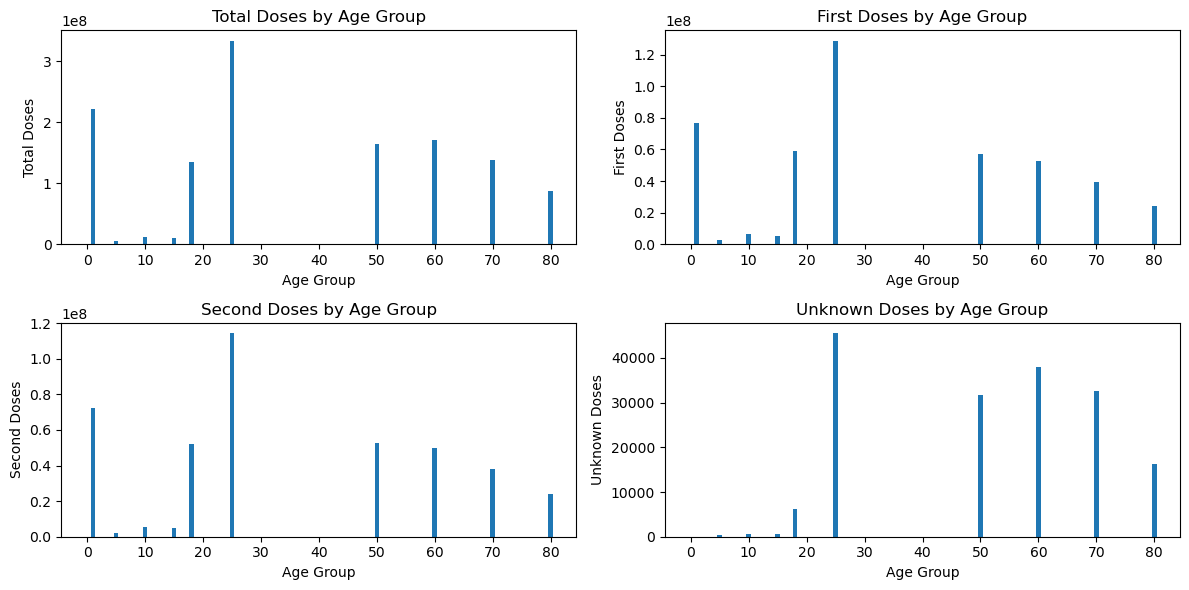

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Group by 'AgeGroup' and calculate the sum of each dose type
grouped_data = df.groupby('AgeGroup')[['TotalDose', 'FirstDose', 'SecondDose', 'UnknownDose']].sum()

# Plot the data
plt.figure(figsize=(12, 6))

# Total Doses by Age Group
plt.subplot(2, 2, 1)
plt.bar(grouped_data.index, grouped_data['TotalDose'])
plt.title('Total Doses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Doses')

# First Doses by Age Group
plt.subplot(2, 2, 2)
plt.bar(grouped_data.index, grouped_data['FirstDose'])
plt.title('First Doses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('First Doses')

# Second Doses by Age Group
plt.subplot(2, 2, 3)
plt.bar(grouped_data.index, grouped_data['SecondDose'])
plt.title('Second Doses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Second Doses')

# Unknown Doses by Age Group
plt.subplot(2, 2, 4)
plt.bar(grouped_data.index, grouped_data['UnknownDose'])
plt.title('Unknown Doses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Unknown Doses')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Exploring the Covid 19 Doses by Vacine

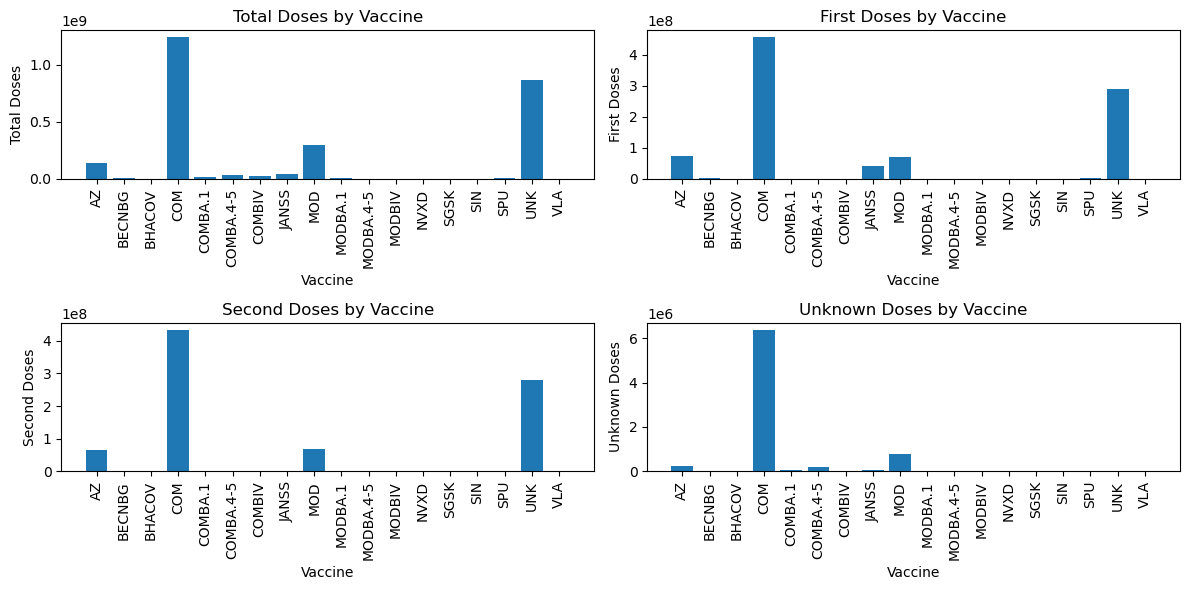

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Group by 'Vaccine' and calculate the sum of each dose type
grouped_data = df.groupby('Vaccine')[['TotalDose', 'FirstDose', 'SecondDose', 'UnknownDose']].sum()

# Plot the data
plt.figure(figsize=(12, 6))

# Total Doses by Vaccine
plt.subplot(2, 2, 1)
plt.bar(grouped_data.index, grouped_data['TotalDose'])
plt.title('Total Doses by Vaccine')
plt.xlabel('Vaccine')
plt.ylabel('Total Doses')
plt.xticks(rotation=90)

# First Doses by Vaccine
plt.subplot(2, 2, 2)
plt.bar(grouped_data.index, grouped_data['FirstDose'])
plt.title('First Doses by Vaccine')
plt.xlabel('Vaccine')
plt.ylabel('First Doses')
plt.xticks(rotation=90)

# Second Doses by Vaccine
plt.subplot(2, 2, 3)
plt.bar(grouped_data.index, grouped_data['SecondDose'])
plt.title('Second Doses by Vaccine')
plt.xlabel('Vaccine')
plt.ylabel('Second Doses')
plt.xticks(rotation=90)

# Unknown Doses by Vaccine
plt.subplot(2, 2, 4)
plt.bar(grouped_data.index, grouped_data['UnknownDose'])
plt.title('Unknown Doses by Vaccine')
plt.xlabel('Vaccine')
plt.ylabel('Unknown Doses')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Total Pupulation by Country

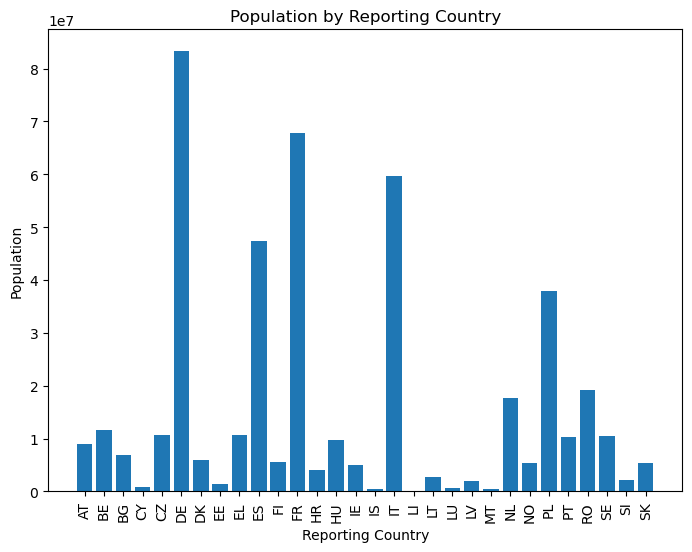

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Group by 'ReportingCountry' and population, calculate the sum of total doses
country_population_total_doses = df.groupby(['ReportingCountry', 'Population'])['TotalDose'].sum().reset_index()

# Plot the population by reporting country
plt.figure(figsize=(18, 6))

# Population by Reporting Country
plt.subplot(1, 2, 1)
plt.bar(country_population_total_doses['ReportingCountry'], country_population_total_doses['Population'])
plt.title('Population by Reporting Country')
plt.xlabel('Reporting Country')
plt.ylabel('Population')
plt.xticks(rotation=90)

# Show the plots
plt.show()

# Total Covid-19 Doses Over the months till 2023

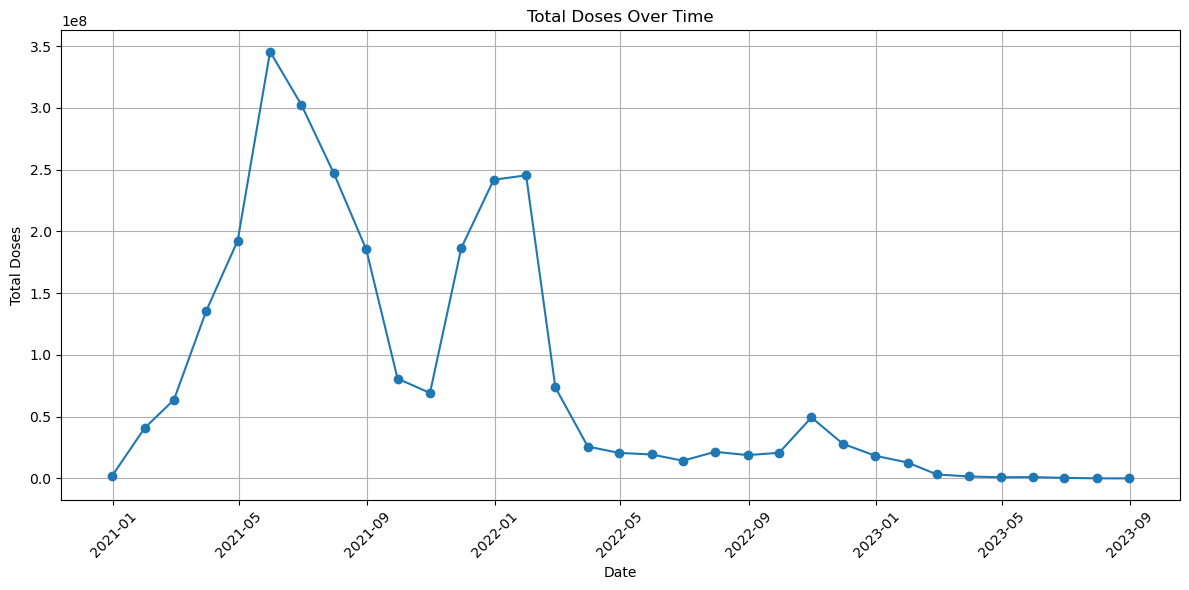

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and you have a 'Date' column

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by month and calculate the sum of total doses
monthly_total_doses = df.resample('M', on='Date')['TotalDose'].sum()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_total_doses.index, monthly_total_doses.values, marker='o', linestyle='-')
plt.title('Total Doses Over Time')
plt.xlabel('Date')
plt.ylabel('Total Doses')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Total Covid-19 Doses Over the Years till 2023¶

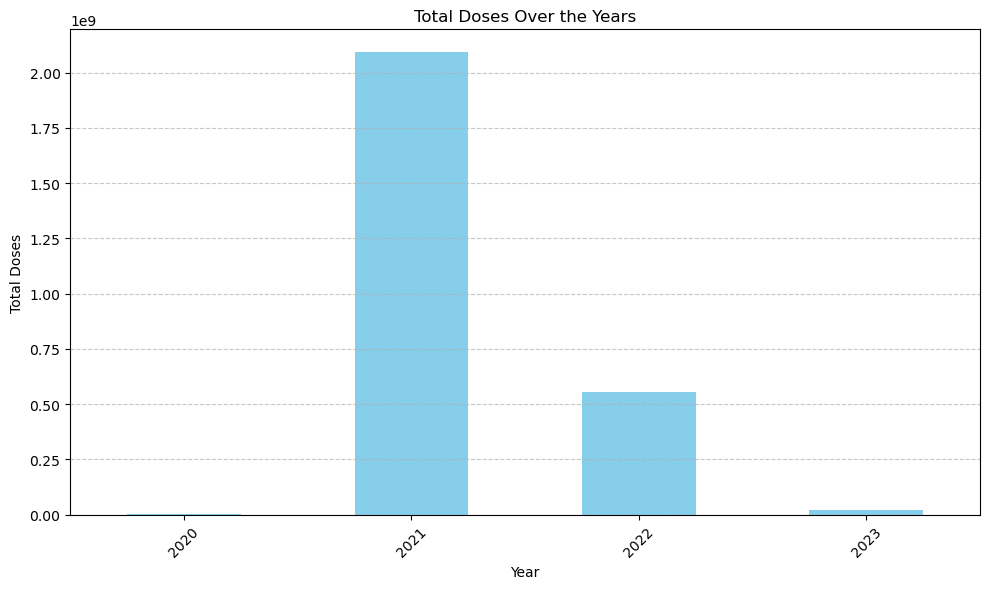

In [94]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group by year and calculate the sum of total doses
yearly_total_doses = df.groupby('Year')['TotalDose'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
yearly_total_doses.plot(kind='bar', color='skyblue')
plt.title('Total Doses Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Doses')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Findings from the Analysis of COVID-19 Vaccination Data:

Country with the Most Doses: France (FR) has administered the most COVID-19 vaccine doses, with a total of 631,994,928 doses, followed by Italy (IT) and Germany (DE).

Age Group with the Most Doses: The age group between 30 and 40 years old received the most doses of all types, followed by the age group between 50 and 60 years old.

Country with the Most Unknown Doses: Italy (IT) has the highest number of unknown doses, totaling 7,246,376 doses, followed by Ireland (IE).

Most Used Vaccine: The most commonly used vaccine in the EU/EEA is "COM" with 120,985 doses administered, followed by "UNK."

Population Distribution: According to the data, Germany (DE) has the largest population, followed by France (FR).

Trends Over the Years: There was a spike in COVID-19 vaccine doses administered in 2021, but the numbers have been gradually decreasing over the years, with a declining trend observed until 2023.



# Recommendations:

Targeted Vaccination Campaigns: Given that the age group between 30 and 40 years old has received the most doses, health authorities should continue targeting this age group for vaccination campaigns while also ensuring equitable access across all age groups.

Unknown Doses Investigation: Italy (IT) has the highest number of unknown doses. It is essential for health authorities to investigate and address this issue, ensuring accurate data recording and reporting.

Monitoring Vaccine Usage: While "COM" is the most used vaccine, continuous monitoring of vaccine effectiveness and safety is crucial. Health authorities should adapt their vaccination strategies based on the performance of different vaccines.

Population-Based Allocation: Germany (DE) and France (FR) have the largest populations. Vaccine distribution and allocation should be in proportion to the population size, ensuring fair access to vaccines across all countries.

Continuous Data Analysis: Regular analysis of vaccination data is essential for making informed decisions and adjustments in vaccination strategies. Authorities should continue monitoring trends and adapting their efforts accordingly.

Promoting Vaccine Confidence: To increase vaccine acceptance and coverage, public health campaigns should focus on promoting vaccine confidence and addressing vaccine hesitancy.

These findings and recommendations can help guide vaccination efforts and strategies in the EU/EEA region, ensuring the efficient and equitable distribution of COVID-19 vaccines to protect public health.